Examples and Applications for QuSpICE (Quantum Sparse Interations in Compact Encoding)

Copyright 2022 William M. Kirby

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

In [14]:
import math
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import itertools as it
from copy import deepcopy
from functools import reduce

import quspice as qs

In [15]:
# FockState example in the Front Form in 1+1D: the single momentum in each mode is between 1 and 15 (the total momentum).

f = qs.FockState([ [1,[0,0],[4]], [2,[0,0],[3]], [1,[1,0],[2]], [1,[1,1],[3]] ], 1, [[1,15]], 15)

print(f.__str__())

boson [3], occ = 2
boson [4], occ = 1
fermion [2], occ = 1
antifermion [3], occ = 1



In [16]:
# Compton scattering in 3+1D on a [-20,20]x[-20,20]x[-20,20] lattice: boson+fermion in, boson+fermion out
qn_in = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
qn_out = qn_in
grid = [[-20,20],[-20,20],[-20,20]]
i = qs.Interaction(4, 2, qn_in, qn_out, 3, grid)

print(i._qn_in)
print(i._qn_out)
print(i._qn_out_names[0])

[[0, 0], [1, 0]]
[[0, 0], [1, 0]]
['boson/fermion', 'particle/antiparticle']


In [17]:
# Another interaction example
qn_in = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
qn_out = [{'boson/fermion':1,'particle/antiparticle':0}]
lf_cutoff = [[1,16]]
i = qs.Interaction(3, 1, qn_in, qn_out, 1, lf_cutoff)

print(i._qn_in)
print(i._qn_out)

[[0, 0], [1, 0]]
[[1, 0]]


In [29]:
# Complete gate count for FrontForm (Yukawa) Hamiltonian (in terms of controlled arithmetic operations)
# (see https://arxiv.org/abs/2002.04016 for derivation of this Hamiltonian)

k_list = [3]+[int(2*1.2**(i+1)) for i in range(4,18)]
# k_list = [int(2*1.2**(i+1)) for i in range(28,30)]

# Mass
# h = 0 # number
# qn_in = []
# # outgoing particles
# g = 0 # number
# qn_out = []

# data = [len(enumerator_circuit(Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))) for k in k_list]

data = [[k,0] for k in k_list]


# Vertex 1
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(1)

    
# Vertex 2
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(2)
    

# Vertex 3
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(3)

    
# Vertex 4
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(4)
    

# Vertex 5
h = 2 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(5)
    
    
# Vertex 6
h = 1 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(6)
    
    
# Seagull 1
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = qn_in

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(7)
    
    
# Seagull 2
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 2 # number
qn_out = qn_in

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(8)
    
    
# Seagull 3
h = 2 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))

print(9)
    
    
# Seagull 4
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(10)
    

# Fork 1
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0}]
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(11)
    
    
# Fork 2
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
    
    
# Fork 3
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
    
    
# Fork 4
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(14)
    
    
# Fork 5
h = 1 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
print(15)
    
    
# Fork 6
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':0},{'boson/fermion':1,'particle/antiparticle':1}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))
    
data

1
2
3
4
5
6
7
8
9
10
11
14
15


[[3, 12589.0],
 [4, 12767.0],
 [5, 13015.0],
 [7, 20957.0],
 [8, 21481.0],
 [10, 22853.0],
 [12, 24741.0],
 [14, 35083.0],
 [17, 40109.0],
 [21, 49629.0],
 [25, 71673.0],
 [30, 94701.0],
 [36, 133319.0],
 [44, 216641.0],
 [53, 335615.0]]

In [26]:
# Here are the results of running the above cell for a while
# (unless you changed the parameters, the above cell will only
# generate the beginning of this list):

data_ff = [[3, 12589.0],
 [4, 12767.0],
 [5, 13015.0],
 [7, 20957.0],
 [8, 21481.0],
 [10, 22853.0],
 [12, 24741.0],
 [14, 35083.0],
 [17, 40109.0],
 [21, 49629.0],
 [25, 71673.0],
 [30, 94701.0],
 [36, 133319.0],
 [44, 216641.0],
 [53, 335615.0],
 [63, 532063.0],
 [76, 885539.0],
 [92, 1490991.0],
 [110, 2478177.0],
 [132, 4185991.0],
 [158, 7053421.0],
 [190, 12092311.0],
 [228, 20666727.0],
 [274, 35556615.0],
 [329, 61131829.0]]

In [28]:
# Yukawa in equal time
k_list = [3]+[int(2*1.2**(i+1)) for i in range(4,28)] # k is the number of lattice points
# k_list = [int(2*1.2**(i+1)) for i in range(25,26)]
# k_list = [k for k in range(3,100)]
et_cutoffs = [int(np.ceil(k/2)-1) for k in k_list]

data = [[k,0] for k in k_list]

# fermion and boson in, fermion out
h = 2 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0},{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# boson in, fermion and antifermion out 
h = 1 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# boson, fermion, and antifermion in, nothing out 
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]
# outgoing particles
g = 0 # number
qn_out = []

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# antifermion and boson in, antifermion out
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# fermion in, boson and fermion out 
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)

# nothing in, boson, fermion, and antifermion out 
h = 0 # number
qn_in = []
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0},{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)

# fermion and antifermion in, boson out
h = 2 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0},{'boson/fermion':1,'particle/antiparticle':0,'spin +/-':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)

# antifermion in, boson and antifermion out
h = 1 # number
qn_in = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':1,'particle/antiparticle':1,'spin +/-':0},{'boson/fermion':0,'particle/antiparticle':0,'spin +/-':0}]

for i in range(len(k_list)):
    k = k_list[i]
    #print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    

# multiply by 4 to account for spin assignments
data = [[d[0],4*d[1]] for d in data]

data

[[3, 10300.0],
 [4, 13972.0],
 [5, 18596.0],
 [7, 27564.0],
 [8, 31540.0],
 [10, 41444.0],
 [12, 52180.0],
 [14, 63812.0],
 [17, 84724.0],
 [21, 114532.0],
 [25, 149076.0],
 [30, 196804.0],
 [36, 269204.0],
 [44, 389332.0],
 [53, 566500.0],
 [63, 811340.0],
 [76, 1218004.0],
 [92, 1898580.0],
 [110, 2930244.0],
 [132, 4639380.0],
 [158, 7404740.0],
 [190, 12114884.0],
 [228, 19921300.0],
 [274, 33183652.0],
 [329, 55582868.0]]

In [27]:
# Here are the results of running the above cell:

data_et = [[3, 10300.0],
 [4, 13972.0],
 [5, 18596.0],
 [7, 27564.0],
 [8, 31540.0],
 [10, 41444.0],
 [12, 52180.0],
 [14, 63812.0],
 [17, 84724.0],
 [21, 114532.0],
 [25, 149076.0],
 [30, 196804.0],
 [36, 269204.0],
 [44, 389332.0],
 [53, 566500.0],
 [63, 811340.0],
 [76, 1218004.0],
 [92, 1898580.0],
 [110, 2930244.0],
 [132, 4639380.0],
 [158, 7404740.0],
 [190, 12114884.0],
 [228, 19921300.0],
 [274, 33183652.0],
 [329, 55582868.0]]

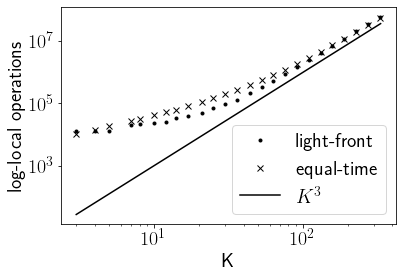

In [30]:
plt.plot([d[0] for d in data_ff],[d[1] for d in data_ff],'.',color='k',label='light-front')
plt.plot([d[0] for d in data_et],[d[1] for d in data_et],'x',color='k',label='equal-time')
plt.plot([k for k in np.arange(3,data_ff[-1][0]+5)],[k**3 for k in np.arange(3,data_ff[-1][0]+5)],'-',color='k',label=r'$K^3$')

plt.ylabel('log-local operations')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('K',fontsize=20)
plt.ylabel('log-local operations',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc='lower right',fontsize=20)
plt.savefig('GateCounts_Yukawa.pdf',bbox_inches='tight')
plt.show()

In [32]:
# Gate count for phi^4 in 1+1D light-front (in terms of controlled arithmetic operations)

k_list = [3]+[int(2*1.2**(i+1)) for i in range(4,15)]
# k_list = [int(2*1.2**(i+1)) for i in range(25,26)]
# k_list = [k for k in range(3,100)]

# data = [len(enumerator_circuit(Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),3*int(np.sqrt(2*k/3)+1))) for k in k_list]

data = [[k,0] for k in k_list]

# 3 in, 1 out
# incoming particles
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
#     print(k)
    cutoff = int(np.ceil(k/2)-1)
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),mode_registers)
    
# 2 in, 2 out
# incoming particles
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
#     print(k)
    cutoff = int(np.ceil(k/2)-1)
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),mode_registers)

# 1 in, 3 out
# incoming particles
h = 1 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    print(k)
    cutoff = int(np.ceil(k/2)-1)
    mode_registers = 3*int(np.sqrt(2*k/3)+1)
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[1,k]]),mode_registers)

data

3
4
5
7
8
10
12
14
17
21
25
30


[[3, 2550.0],
 [4, 2581.0],
 [5, 2629.0],
 [7, 4285.0],
 [8, 4387.0],
 [10, 4651.0],
 [12, 5033.0],
 [14, 7257.0],
 [17, 8302.0],
 [21, 10313.0],
 [25, 15144.0],
 [30, 20138.0]]

In [33]:
# Here are the results of running the above cell for a while
# (unless you changed the parameters, the above cell will only
# generate the beginning of this list):

data_ff = [[3, 2550.0],
 [4, 2581.0],
 [5, 2629.0],
 [7, 4285.0],
 [8, 4387.0],
 [10, 4651.0],
 [12, 5033.0],
 [14, 7257.0],
 [17, 8302.0],
 [21, 10313.0],
 [25, 15144.0],
 [30, 20138.0],
 [36, 28607.0],
 [44, 47194.0],
 [53, 73769.0],
 [63, 118140.0],
 [76, 198385.0],
 [92, 336022.0],
 [110, 561794.0],
 [132, 953582.0],
 [158, 1613120.0],
 [190, 2774668.0],
 [228, 4754983.0]]

In [35]:
# Gate count for phi^4 in 1+1D Equal Time (in terms of controlled arithmetic operations)

k_list = [3]+[int(2*1.2**(i+1)) for i in range(4,15)] # here k is just the number of lattice points
# k_list = [int(2*1.2**(i+1)) for i in range(26,27)]
et_cutoffs = [int(np.ceil(k/2)-1) for k in k_list]

data = [[k,0] for k in k_list]

# 4 in, 0 out
# incoming particles
h = 4 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 0 # number
qn_out =  []
for i in range(len(k_list)):
    k = k_list[i]
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)

# 3 in, 1 out
# incoming particles
h = 3 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 1 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# 2 in, 2 out
# incoming particles
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# 1 in, 3 out
# incoming particles
h = 1 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 3 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
    print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# 0 in, 4 out
# incoming particles
h = 0 # number
qn_in = []
# outgoing particles
g = 4 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]

for i in range(len(k_list)):
    k = k_list[i]
#     print(k)
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# 0 in, 2 out
# incoming particles
h = 0 # number
qn_in = []
# outgoing particles
g = 2 # number
qn_out = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
for i in range(len(k_list)):
    k = k_list[i]
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)
    
# 2 in, 0 out
# incoming particles
h = 2 # number
qn_in = [{'boson/fermion':0,'particle/antiparticle':0},{'boson/fermion':0,'particle/antiparticle':0}]
# outgoing particles
g = 0 # number
qn_out =  []
for i in range(len(k_list)):
    k = k_list[i]
    cutoff = et_cutoffs[i]
    mode_registers = k
    data[i][1] += qs.enumerator_circuit_gatecount(qs.Interaction(g+h, g, qn_in, qn_out, 1, [[-cutoff,cutoff]]),mode_registers)

data

3
4
5
7
8
10
12
14
17
21
25
30


[[3, 2439.0],
 [4, 3350.0],
 [5, 4582.0],
 [7, 7231.0],
 [8, 8426.0],
 [10, 12032.0],
 [12, 16681.0],
 [14, 22692.0],
 [17, 36596.0],
 [21, 61940.0],
 [25, 99921.0],
 [30, 166290.0]]

In [36]:
# Here are the results of running the above cell for a while
# (unless you changed the parameters, the above cell will only
# generate the beginning of this list):

data_et = [[3, 2439.0],
 [4, 3350.0],
 [5, 4582.0],
 [7, 7231.0],
 [8, 8426.0],
 [10, 12032.0],
 [12, 16681.0],
 [14, 22692.0],
 [17, 36596.0],
 [21, 61940.0],
 [25, 99921.0],
 [30, 166290.0],
 [36, 296490.0],
 [44, 578357.0],
 [53, 1115532.0],
 [63, 2053376.0],
 [76, 4009577.0],
 [92, 8108575.0],
 [110, 15808528.0],
 [132, 31473086.0],
 [158, 62446518.0],
 [190, 126787026.0],
 [228, 256501714.0]]

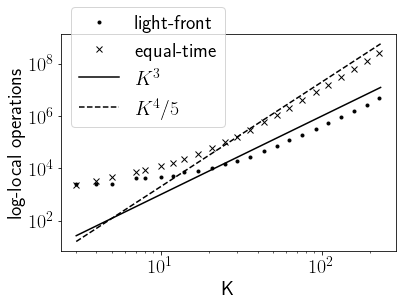

In [37]:
plt.plot([d[0] for d in data_ff],[d[1] for d in data_ff],'.',color='k',label='light-front')
plt.plot([d[0] for d in data_et],[d[1] for d in data_et],'x',color='k',label='equal-time')
plt.plot([k for k in np.arange(3,data_ff[-1][0]+5)],[k**3 for k in np.arange(3,data_ff[-1][0]+5)],'-',color='k',label=r'$K^3$')
plt.plot([k for k in np.arange(3,data_ff[-1][0]+5)],[0.2*(k**4) for k in np.arange(3,data_ff[-1][0]+5)],'--',color='k',label=r'$K^4/5$')

plt.ylabel('log-local operations')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('K',fontsize=20)
plt.ylabel('log-local operations',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=(0.03,0.57),fontsize=20)
plt.savefig('GateCounts_Phi4.pdf',bbox_inches='tight')
plt.show()